## Assignment 4

Authors: Ari and Lucas

For this assignment, we are going to analyze the text corpus for Mary Schelley's Frankstein. A classic horror first published in 1818. We acquire it from the Gutenberg project for simplicity.

In [7]:
import requests
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

url = "https://www.gutenberg.org/files/84/84-0.txt"
full_text = requests.get(url).text

After loading the data, we pre-process the text. We set the start and end markers, tokenize the text where each word is a distinct sequence of letters.

In [8]:
#Pre-process the text to extract the main content of the book.
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN ***"
start_index = full_text.find(start_marker) + len(start_marker)
end_index = full_text.find(end_marker)
corpus_text = full_text[start_index:end_index]

#Tokenize the text into words: lowercase and alphabetic characters only.
all_words = re.findall(r'[a-z]+', corpus_text.lower())

#A unique word is a distinct sequence of letters (case-insensitive).
word_counts = Counter(all_words)
total_unique_words = len(word_counts)

print(f"Total Unique Words: {total_unique_words}")

Total Unique Words: 6981


Next, we're going to count how many unique words represent half of the total words. This allows us to gauge how variable the text may be. A lower number would point to a text with fewer unique words.

Additionally, we're going to identify the 200 highest frequency words.

In [9]:
#How many unique words represent half of the total words?
total_words_in_corpus = len(all_words)
half_total_words = total_words_in_corpus / 2
running_total = 0
words_for_half_corpus = 0

#Sort words by frequency in descending order
most_common_words = word_counts.most_common()

for word, count in most_common_words:
    if running_total >= half_total_words:
        break
    running_total += count
    words_for_half_corpus += 1

print(f"Unique words for half of total: {words_for_half_corpus}")

#Identify the 200 highest frequency words in this corpus.
top_200_words = most_common_words[:200]
print("\n The 200 Highest Frequency Words:")
#Printing the top 10 as a sample
for i, (word, count) in enumerate(top_200_words[:10]):
    print(f"{i+1:3d}. {word:<10s} {count:4d}")

Unique words for half of total: 62

 The 200 Highest Frequency Words:
  1. the        4196
  2. and        2976
  3. i          2850
  4. of         2643
  5. to         2094
  6. my         1776
  7. a          1391
  8. in         1129
  9. was        1021
 10. that       1018


To gain a better understanding of the relative freuqnecy of these words, we visualize the relative frequency of the 200 words.


Graph of relative frequencies has been generated.


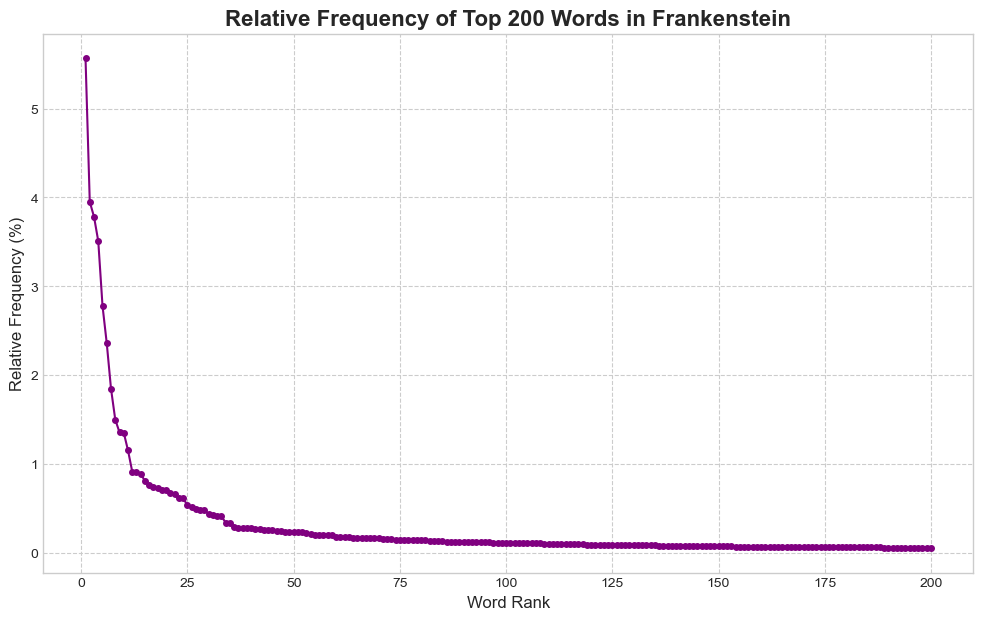

In [10]:
#Create a graph that shows the relative frequency of these 200 words.
ranks = np.arange(1, 201)
frequencies = [count for word, count in top_200_words]
relative_frequencies = (np.array(frequencies) / total_words_in_corpus) * 100

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(ranks, relative_frequencies, marker='o', linestyle='-', color='purple', markersize=4)
ax.set_title("Relative Frequency of Top 200 Words in Frankenstein", fontsize=16, fontweight='bold')
ax.set_xlabel("Word Rank", fontsize=12)
ax.set_ylabel("Relative Frequency (%)", fontsize=12)
ax.grid(True, which="both", ls="--")

print("\nGraph of relative frequencies has been generated.")
plt.show()

As can be seen in the graph, the observed relative frequency of words in "Frankenstein" strongly follows Zipf's law.

Zipf's law states that a word's frequency is inversely proportional to its rank. This means the most common word appears about twice as often as the second most common, three times as often as the third, and so on.

The graph above demonstrates this perfectly. The steep, concave downward curve is the classic signature of a Zipfian distribution. When plotted on a log-log scale, the relationship would appear as a nearly straight line, which is a definitive characteristic of a power-law relationship like Zipf's law. The data clearly shows a few words are used extremely frequently, while the vast majority of words are used rarely.

The corpus of Frankstein likely differs in the middle of most frequent words substantially, but so much with the most used words. As can be seen, the most frequent words are stop words, such as "and", "the" and "if". Following these words, we'd likely see words more particular to the story, such as "monster" or "creature". These would of course be specific to the book, at least to the genre.